# Exploration der Word2vec Embeddings 2

- Zeiträume: 50 Jahre
- ohne Bigramme
- vector_size: 300
- window: 5

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statistics 

from collections import Counter
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from scipy import spatial
from sklearn.manifold import TSNE
from tabulate import tabulate

In [2]:
# trainierte Modelle laden

w2v1 = Word2Vec.load(os.path.join('trained_models/Word2Vec2', '2w2v1.model'))
w2v2 = Word2Vec.load(os.path.join('trained_models/Word2Vec2', '2w2v2.model'))
w2v3 = Word2Vec.load(os.path.join('trained_models/Word2Vec2', '2w2v3.model'))
w2v4 = Word2Vec.load(os.path.join('trained_models/Word2Vec2', '2w2v4.model'))
w2v5 = Word2Vec.load(os.path.join('trained_models/Word2Vec2', '2w2v5.model'))
w2v6 = Word2Vec.load(os.path.join('trained_models/Word2Vec2', '2w2v6.model'))
w2v7 = Word2Vec.load(os.path.join('trained_models/Word2Vec2', '2w2v7.model'))

In [3]:
periods = ['1700-1750', '1751-1800', '1801-1850', '1851-1900', '1901-1950', '1951-2000', '2001-2021']

In [4]:
models = [w2v1, w2v2, w2v3, w2v4, w2v5, w2v6, w2v7] 

In [5]:
# Hilfsfunktion zum Vergleich der most similar words eines Lemmas in den Zeitabschnitten

def compare_words(periods, models, word):
    msw = {}
    for p, m in zip(periods, models):
        if word in m.wv:
            msw.update({p : m.wv.most_similar(positive=[word], topn=10)})
        elif word not in m.wv:
            msw.update({p : 'not in vocab'})
    table = pd.DataFrame.from_dict(msw)
    return table

In [6]:
# Hilfsfunktion zum Vergleich der Cosinus-Ähnlichkeit in den Zeitabschnitten

def compare_cos(periods, models, word1, word2):
    cosines = {}
    for p, m in zip(periods, models):
        if word1 in m.wv:
            vector1 = m.wv[word1]  
            vector2 = m.wv[word2]  
            cos = 1 - spatial.distance.cosine(vector1, vector2) 
            cosines.update({p : cos})
    return cosines

## Kontrollgruppe

### Kontrollgruppe - molto

In [7]:
domani0 = compare_cos(periods, models, 'domani', 'molto')
finora0 = compare_cos(periods, models, 'finora', 'molto')
ieri0 = compare_cos(periods, models, 'ieri', 'molto')
oggi0 = compare_cos(periods, models, 'oggi', 'molto')
presto0 = compare_cos(periods, models, 'presto', 'molto')
sempre0 = compare_cos(periods, models, 'sempre', 'molto')
spesso0 = compare_cos(periods, models, 'spesso', 'molto')
essere0 = compare_cos(periods, models, 'essere', 'molto')
avere0 = compare_cos(periods, models, 'avere', 'molto')

In [8]:
spesso0

{'1700-1750': 0.3607986569404602,
 '1751-1800': 0.48776936531066895,
 '1801-1850': 0.6102344393730164,
 '1851-1900': 0.4526011049747467,
 '1901-1950': 0.5314629077911377,
 '1951-2000': 0.4890502393245697,
 '2001-2021': 0.5386391878128052}

In [9]:
molto_df = pd.DataFrame([domani0, finora0, ieri0, oggi0, presto0, sempre0, spesso0, essere0, avere0])

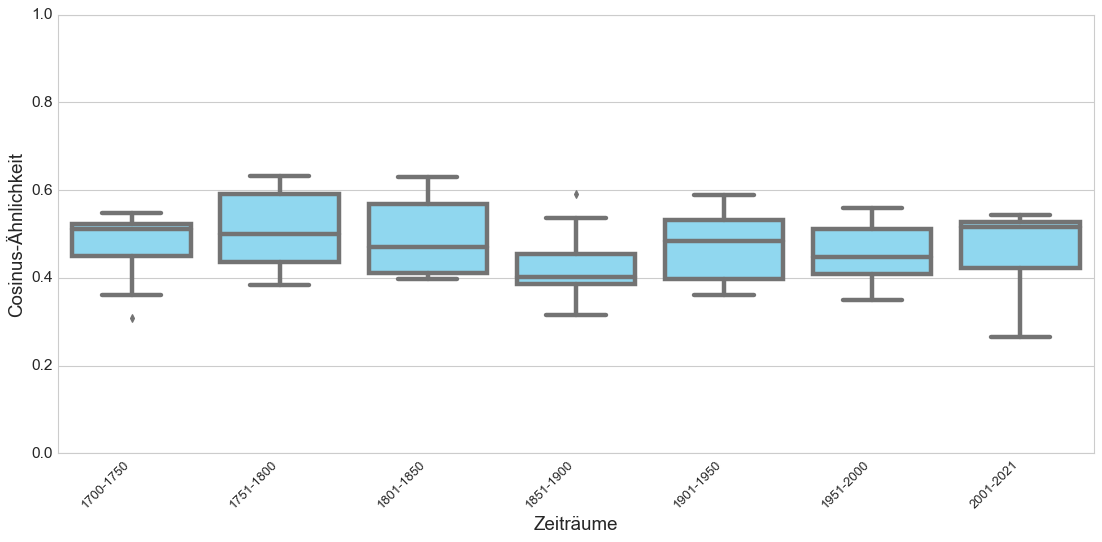

In [15]:
# box plot

plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(periods)))
plt.xticks(ticks=x_indexes, labels=periods, rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

sns.boxplot(data=molto_df, color='#80dfff');

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right', fontsize='small')

plt.show()

In [16]:
# Median pro Zeitraum
molto_median = dict(molto_df.median())

# 25%-Quantil
molto_25 = dict(molto_df.quantile(0.25))
molto_25_list = [float(x) for x in list(molto_25.values())]

# 75%-Quantil
molto_75 = dict(molto_df.quantile(0.75))
molto_75_list = [float(x) for x in list(molto_75.values())]

# min
molto_min = dict(molto_df.min())
molto_min_list = [float(x) for x in list(molto_min.values())]

# max
molto_max = dict(molto_df.max())
molto_max_list = [float(x) for x in list(molto_max.values())]

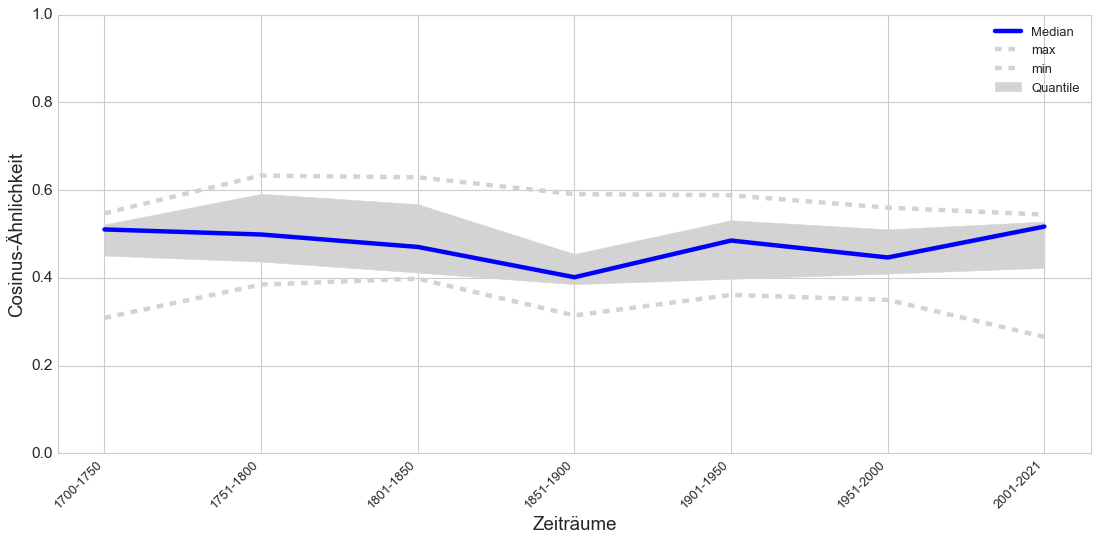

In [17]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(molto_median)))
plt.xticks(ticks=x_indexes, labels=molto_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, molto_median.values(), label='Median', color='b')
plt.fill_between(x_indexes, molto_75_list, molto_25_list, label='Quantile', color='#D3D3D3')
plt.plot(x_indexes, molto_max_list, label='max', linestyle='--', color='#D3D3D3')
plt.plot(x_indexes, molto_min_list, label='min', linestyle='--', color='#D3D3D3')


# Regressionslinie
#coef = np.polyfit(x_indexes, list(molto_median.values()), 1)
#poly1d_fn = np.poly1d(coef) 
#plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### Kontrollgruppe - Quelldomäne

In [18]:
# domani 

domani1 = compare_cos(periods, models, 'domani', 'angoscia')
domani2 = compare_cos(periods, models, 'domani', 'atterrire')
domani3 = compare_cos(periods, models, 'domani', 'panico')
domani4 = compare_cos(periods, models, 'domani', 'paura')
domani6 = compare_cos(periods, models, 'domani', 'schifo')
domani7 = compare_cos(periods, models, 'domani', 'sgomentare')
domani8 = compare_cos(periods, models, 'domani', 'sgomento')
domani9 = compare_cos(periods, models, 'domani', 'spaventare')
domani10 = compare_cos(periods, models, 'domani', 'spavento')
domani11 = compare_cos(periods, models, 'domani', 'terrore')

domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani6, domani7, domani8, domani9, domani10, domani11])

# Median pro Zeitraum
domani_median = dict(domani_df.median())

# 25%-Quantil
domani_25 = dict(domani_df.quantile(0.25))
domani25_list = [float(x) for x in list(domani_25.values())]

# 75%-Quantil
domani_75 = dict(domani_df.quantile(0.75))
domani_75_list = [float(x) for x in list(domani_75.values())]

# min pro Zeitraum
domani_min = dict(domani_df.min())
domani_min_list = [float(x) for x in list(domani_min.values())]

#max pro Zeitraum 
domani_max = dict(domani_df.max())
domani_max_list = [float(x) for x in list(domani_max.values())]

In [19]:
# finora 

finora1 = compare_cos(periods, models, 'finora', 'angoscia')
finora2 = compare_cos(periods, models, 'finora', 'atterrire')
finora3 = compare_cos(periods, models, 'finora', 'panico')
finora4 = compare_cos(periods, models, 'finora', 'paura')
finora6 = compare_cos(periods, models, 'finora', 'schifo')
finora7 = compare_cos(periods, models, 'finora', 'sgomentare')
finora8 = compare_cos(periods, models, 'finora', 'sgomento')
finora9 = compare_cos(periods, models, 'finora', 'spaventare')
finora10 = compare_cos(periods, models, 'finora', 'spavento')
finora11 = compare_cos(periods, models, 'finora', 'terrore')

finora_df = pd.DataFrame([finora1, finora2, finora3, finora4, finora6, finora7, finora8, finora9, finora10, finora11])

# Median pro Zeitraum
finora_median = dict(finora_df.median())

# 25%-Quantil
finora_25 = dict(finora_df.quantile(0.25))
finora25_list = [float(x) for x in list(finora_25.values())]

# 75%-Quantil
finora_75 = dict(finora_df.quantile(0.75))
finora_75_list = [float(x) for x in list(finora_75.values())]

# min pro Zeitraum
finora_min = dict(finora_df.min())
finora_min_list = [float(x) for x in list(finora_min.values())]

#max pro Zeitraum 
finora_max = dict(finora_df.max())
finora_max_list = [float(x) for x in list(finora_max.values())]

In [20]:
# ieri 

ieri1 = compare_cos(periods, models, 'ieri', 'angoscia')
ieri2 = compare_cos(periods, models, 'ieri', 'atterrire')
ieri3 = compare_cos(periods, models, 'ieri', 'panico')
ieri4 = compare_cos(periods, models, 'ieri', 'paura')
ieri6 = compare_cos(periods, models, 'ieri', 'schifo')
ieri7 = compare_cos(periods, models, 'ieri', 'sgomentare')
ieri8 = compare_cos(periods, models, 'ieri', 'sgomento')
ieri9 = compare_cos(periods, models, 'ieri', 'spaventare')
ieri10 = compare_cos(periods, models, 'ieri', 'spavento')
ieri11 = compare_cos(periods, models, 'ieri', 'terrore')

ieri_df = pd.DataFrame([ieri1, ieri2, ieri3, ieri4, ieri6, ieri7, ieri8, ieri9, ieri10, ieri11])

# Median pro Zeitraum
ieri_median = dict(ieri_df.median())

# 25%-Quantil
ieri_25 = dict(ieri_df.quantile(0.25))
ieri25_list = [float(x) for x in list(ieri_25.values())]

# 75%-Quantil
ieri_75 = dict(ieri_df.quantile(0.75))
ieri_75_list = [float(x) for x in list(ieri_75.values())]

# min pro Zeitraum
ieri_min = dict(ieri_df.min())
ieri_min_list = [float(x) for x in list(ieri_min.values())]

#max pro Zeitraum 
ieri_max = dict(ieri_df.max())
ieri_max_list = [float(x) for x in list(ieri_max.values())]

In [21]:
# oggi 

oggi1 = compare_cos(periods, models, 'oggi', 'angoscia')
oggi2 = compare_cos(periods, models, 'oggi', 'atterrire')
oggi3 = compare_cos(periods, models, 'oggi', 'panico')
oggi4 = compare_cos(periods, models, 'oggi', 'paura')
oggi6 = compare_cos(periods, models, 'oggi', 'schifo')
oggi7 = compare_cos(periods, models, 'oggi', 'sgomentare')
oggi8 = compare_cos(periods, models, 'oggi', 'sgomento')
oggi9 = compare_cos(periods, models, 'oggi', 'spaventare')
oggi10 = compare_cos(periods, models, 'oggi', 'spavento')
oggi11 = compare_cos(periods, models, 'oggi', 'terrore')

oggi_df = pd.DataFrame([oggi1, oggi2, oggi3, oggi4, oggi6, oggi7, oggi8, oggi9, oggi10, oggi11])

# Median pro Zeitraum
oggi_median = dict(oggi_df.median())

# 25%-Quantil
oggi_25 = dict(oggi_df.quantile(0.25))
oggi25_list = [float(x) for x in list(oggi_25.values())]

# 75%-Quantil
oggi_75 = dict(oggi_df.quantile(0.75))
oggi_75_list = [float(x) for x in list(oggi_75.values())]

# min pro Zeitraum
oggi_min = dict(oggi_df.min())
oggi_min_list = [float(x) for x in list(oggi_min.values())]

#max pro Zeitraum 
oggi_max = dict(oggi_df.max())
oggi_max_list = [float(x) for x in list(oggi_max.values())]

In [22]:
# presto 

presto1 = compare_cos(periods, models, 'presto', 'angoscia')
presto2 = compare_cos(periods, models, 'presto', 'atterrire')
presto3 = compare_cos(periods, models, 'presto', 'panico')
presto4 = compare_cos(periods, models, 'presto', 'paura')
presto6 = compare_cos(periods, models, 'presto', 'schifo')
presto7 = compare_cos(periods, models, 'presto', 'sgomentare')
presto8 = compare_cos(periods, models, 'presto', 'sgomento')
presto9 = compare_cos(periods, models, 'presto', 'spaventare')
presto10 = compare_cos(periods, models, 'presto', 'spavento')
presto11 = compare_cos(periods, models, 'presto', 'terrore')

presto_df = pd.DataFrame([presto1, presto2, presto3, presto4, presto6, presto7, presto8, presto9, presto10, presto11])

# Median pro Zeitraum
presto_median = dict(presto_df.median())

# 25%-Quantil
presto_25 = dict(presto_df.quantile(0.25))
presto25_list = [float(x) for x in list(presto_25.values())]

# 75%-Quantil
presto_75 = dict(presto_df.quantile(0.75))
presto_75_list = [float(x) for x in list(presto_75.values())]

# min pro Zeitraum
presto_min = dict(presto_df.min())
presto_min_list = [float(x) for x in list(presto_min.values())]

#max pro Zeitraum 
presto_max = dict(presto_df.max())
presto_max_list = [float(x) for x in list(presto_max.values())]

In [23]:
# sempre 

sempre1 = compare_cos(periods, models, 'sempre', 'angoscia')
sempre2 = compare_cos(periods, models, 'sempre', 'atterrire')
sempre3 = compare_cos(periods, models, 'sempre', 'panico')
sempre4 = compare_cos(periods, models, 'sempre', 'paura')
sempre6 = compare_cos(periods, models, 'sempre', 'schifo')
sempre7 = compare_cos(periods, models, 'sempre', 'sgomentare')
sempre8 = compare_cos(periods, models, 'sempre', 'sgomento')
sempre9 = compare_cos(periods, models, 'sempre', 'spaventare')
sempre10 = compare_cos(periods, models, 'sempre', 'spavento')
sempre11 = compare_cos(periods, models, 'sempre', 'terrore')

sempre_df = pd.DataFrame([sempre1, sempre2, sempre3, sempre4, sempre6, sempre7, sempre8, sempre9, sempre10, sempre11])

# Median pro Zeitraum
sempre_median = dict(sempre_df.median())

# 25%-Quantil
sempre_25 = dict(sempre_df.quantile(0.25))
sempre25_list = [float(x) for x in list(sempre_25.values())]

# 75%-Quantil
sempre_75 = dict(sempre_df.quantile(0.75))
sempre_75_list = [float(x) for x in list(sempre_75.values())]

# min pro Zeitraum
sempre_min = dict(sempre_df.min())
sempre_min_list = [float(x) for x in list(sempre_min.values())]

#max pro Zeitraum 
sempre_max = dict(sempre_df.max())
sempre_max_list = [float(x) for x in list(sempre_max.values())]

In [24]:
# spesso 

spesso1 = compare_cos(periods, models, 'spesso', 'angoscia')
spesso2 = compare_cos(periods, models, 'spesso', 'atterrire')
spesso3 = compare_cos(periods, models, 'spesso', 'panico')
spesso4 = compare_cos(periods, models, 'spesso', 'paura')
spesso6 = compare_cos(periods, models, 'spesso', 'schifo')
spesso7 = compare_cos(periods, models, 'spesso', 'sgomentare')
spesso8 = compare_cos(periods, models, 'spesso', 'sgomento')
spesso9 = compare_cos(periods, models, 'spesso', 'spaventare')
spesso10 = compare_cos(periods, models, 'spesso', 'spavento')
spesso11 = compare_cos(periods, models, 'spesso', 'terrore')

spesso_df = pd.DataFrame([spesso1, spesso2, spesso3, spesso4, spesso6, spesso7, spesso8, spesso9, spesso10, spesso11])

# Median pro Zeitraum
spesso_median = dict(spesso_df.median())

# 25%-Quantil
spesso_25 = dict(spesso_df.quantile(0.25))
spesso25_list = [float(x) for x in list(spesso_25.values())]

# 75%-Quantil
spesso_75 = dict(spesso_df.quantile(0.75))
spesso_75_list = [float(x) for x in list(spesso_75.values())]

# min pro Zeitraum
spesso_min = dict(spesso_df.min())
spesso_min_list = [float(x) for x in list(spesso_min.values())]

#max pro Zeitraum 
spesso_max = dict(spesso_df.max())
spesso_max_list = [float(x) for x in list(spesso_max.values())]

In [25]:
# essere 

essere1 = compare_cos(periods, models, 'essere', 'angoscia')
essere2 = compare_cos(periods, models, 'essere', 'atterrire')
essere3 = compare_cos(periods, models, 'essere', 'panico')
essere4 = compare_cos(periods, models, 'essere', 'paura')
essere6 = compare_cos(periods, models, 'essere', 'schifo')
essere7 = compare_cos(periods, models, 'essere', 'sgomentare')
essere8 = compare_cos(periods, models, 'essere', 'sgomento')
essere9 = compare_cos(periods, models, 'essere', 'spaventare')
essere10 = compare_cos(periods, models, 'essere', 'spavento')
essere11 = compare_cos(periods, models, 'essere', 'terrore')

essere_df = pd.DataFrame([essere1, essere2, essere3, essere4, essere6, essere7, essere8, essere9, essere10, essere11])

# Median pro Zeitraum
essere_median = dict(essere_df.median())

# 25%-Quantil
essere_25 = dict(essere_df.quantile(0.25))
essere25_list = [float(x) for x in list(essere_25.values())]

# 75%-Quantil
essere_75 = dict(essere_df.quantile(0.75))
essere_75_list = [float(x) for x in list(essere_75.values())]

# min pro Zeitraum
essere_min = dict(essere_df.min())
essere_min_list = [float(x) for x in list(essere_min.values())]

#max pro Zeitraum 
essere_max = dict(essere_df.max())
essere_max_list = [float(x) for x in list(essere_max.values())]

In [26]:
# avere 

avere1 = compare_cos(periods, models, 'avere', 'angoscia')
avere2 = compare_cos(periods, models, 'avere', 'atterrire')
avere3 = compare_cos(periods, models, 'avere', 'panico')
avere4 = compare_cos(periods, models, 'avere', 'paura')
avere6 = compare_cos(periods, models, 'avere', 'schifo')
avere7 = compare_cos(periods, models, 'avere', 'sgomentare')
avere8 = compare_cos(periods, models, 'avere', 'sgomento')
avere9 = compare_cos(periods, models, 'avere', 'spaventare')
avere10 = compare_cos(periods, models, 'avere', 'spavento')
avere11 = compare_cos(periods, models, 'avere', 'terrore')

avere_df = pd.DataFrame([avere1, avere2, avere3, avere4, avere6, avere7, avere8, avere9, avere10, avere11])

# Median pro Zeitraum
avere_median = dict(avere_df.median())

# 25%-Quantil
avere_25 = dict(avere_df.quantile(0.25))
avere25_list = [float(x) for x in list(avere_25.values())]

# 75%-Quantil
avere_75 = dict(avere_df.quantile(0.75))
avere_75_list = [float(x) for x in list(avere_75.values())]

# min pro Zeitraum
avere_min = dict(avere_df.min())
avere_min_list = [float(x) for x in list(avere_min.values())]

#max pro Zeitraum 
avere_max = dict(avere_df.max())
avere_max_list = [float(x) for x in list(avere_max.values())]

#### Kontrollgruppe - Quelldomäne gesamt

In [27]:
# Median gesamt

control_median_df = pd.DataFrame([domani_median, finora_median, ieri_median, oggi_median, presto_median, sempre_median, 
                                  spesso_median, essere_median, avere_median])
control_median = dict(control_median_df.median())

In [28]:
# min gesamt

control_min_df = pd.DataFrame([domani_min, finora_min, ieri_min, oggi_min, presto_min, sempre_min, spesso_min, 
                              essere_min, avere_min])
control_min = dict(control_min_df.min())
control_min_list = [float(x) for x in list(control_min.values())]

In [29]:
# 75 gesamt

control_75_df = pd.DataFrame([domani_75, finora_75, ieri_75, oggi_75, presto_75, sempre_75, spesso_75,
                             essere_75, avere_75])
control_75 = dict(control_75_df.quantile(0.75))
control_75_list = [float(x) for x in list(control_75.values())]

In [30]:
# 25%-Quantil gesamt

control_25_df = pd.DataFrame([domani_25, finora_25, ieri_25, oggi_25, presto_25, sempre_25, spesso_25,
                             essere_25, avere_25])
control_25 = dict(control_25_df.quantile(0.25))
control_25_list = [float(x) for x in list(control_25.values())]

In [31]:
# max gesamt

control_max_df = pd.DataFrame([domani_max, finora_max, ieri_max, oggi_max, presto_max, sempre_max, spesso_max,
                              essere_max, avere_max])
control_max = dict(control_max_df.max())
control_max_list = [float(x) for x in list(control_max.values())]

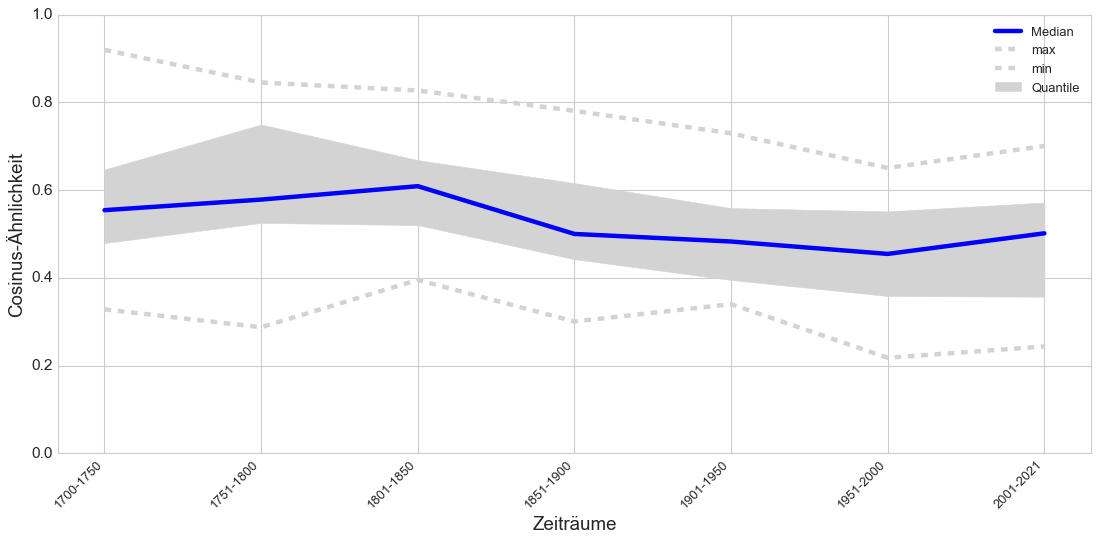

In [32]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(control_median)))
plt.xticks(ticks=x_indexes, labels=control_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, control_median.values(), label='Median', color='b')
plt.fill_between(x_indexes, control_75_list, control_25_list, label='Quantile', color='#D3D3D3')
plt.plot(x_indexes, control_max_list, label='max', linestyle='--', color='#D3D3D3')
plt.plot(x_indexes, control_min_list, label='min', linestyle='--', color='#D3D3D3')

# Regressionslinie
#coef = np.polyfit(x_indexes, list(control_median.values()), 1)
#poly1d_fn = np.poly1d(coef) 
#plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

In [33]:
control_df = pd.concat([domani_df, finora_df, ieri_df, oggi_df, presto_df, sempre_df, spesso_df])

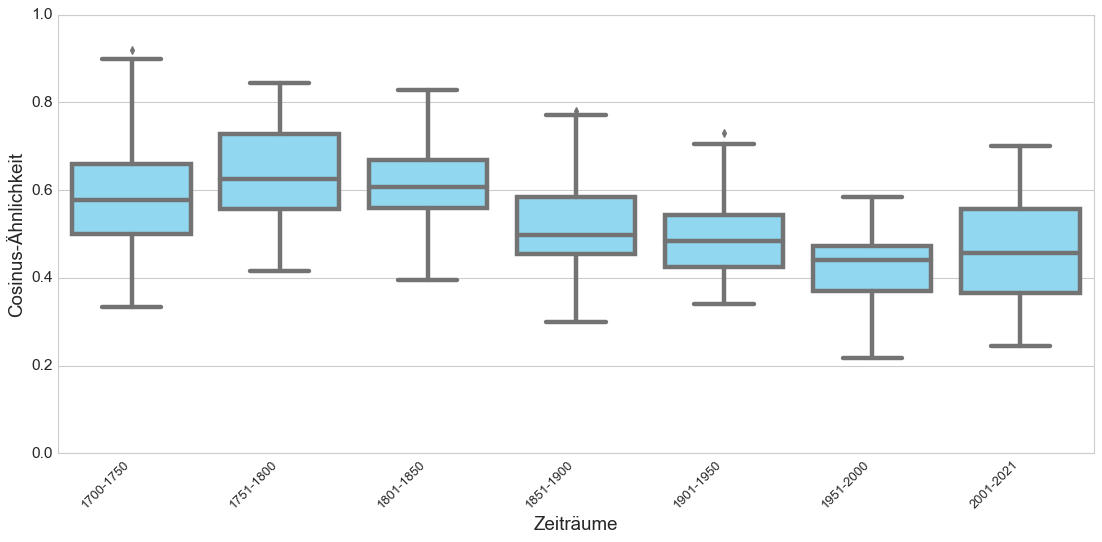

In [34]:
# box plot

plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(periods)))
plt.xticks(ticks=x_indexes, labels=periods, rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

sns.boxplot(data=control_df, color='#80dfff');

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right', fontsize='small')

plt.show()

## Adverbien

### mostruosamente

In [35]:
compare_words(periods, models, 'mostruosamente')

,1700-1750,1751-1800,1801-1850,1851-1900,1901-1950,1951-2000,2001-2021
0,not in vocab,not in vocab,"(farsaglia, 0.9955117106437683)","(cruccio, 0.9533725380897522)","(mutevole, 0.9016672372817993)","(sgargiante, 0.9220589995384216)","(sfumatura, 0.9226375222206116)"
1,not in vocab,not in vocab,"(stramazza, 0.9952493906021118)","(vanitoso, 0.9513323307037354)","(eppur, 0.899201512336731)","(sonorità, 0.9079537391662598)","(nn, 0.9170808792114258)"
2,not in vocab,not in vocab,"(scarabeo, 0.9946733713150024)","(perfidia, 0.9494838118553162)","(ripugnante, 0.8988785743713379)","(inquinato, 0.905733048915863)","(fascino, 0.9136406779289246)"
3,not in vocab,not in vocab,"(drappel, 0.9944498538970947)","(dellirma, 0.9490195512771606)","(armonioso, 0.894459068775177)","(tenue, 0.904694676399231)","(talmente, 0.9104365110397339)"
4,not in vocab,not in vocab,"(divelto, 0.9944299459457397)","(sincera, 0.9470421671867371)","(truce, 0.8894808888435364)","(favoloso, 0.903807520866394)","(scimmia, 0.9075177907943726)"
5,not in vocab,not in vocab,"(cetraro, 0.9943006038665771)","(satanico, 0.9464488625526428)","(sgradevole, 0.8887280225753784)","(agile, 0.9025087356567383)","(riflesso, 0.9058195948600769)"
6,not in vocab,not in vocab,"(cartesiana, 0.9942789673805237)","(amareggiare, 0.9463841915130615)","(intorbidare, 0.8870752453804016)","(nordico, 0.9022939801216125)","(feroce, 0.9035874605178833)"
7,not in vocab,not in vocab,"(marcellina, 0.9942556023597717)","(dellanima, 0.9457849860191345)","(prodigiosamente, 0.8854632377624512)","(oscillare, 0.90149986743927)","(tremendamente, 0.9032151103019714)"
8,not in vocab,not in vocab,"(andrìa, 0.9942227005958557)","(virile, 0.9457446336746216)","(portamento, 0.8844747543334961)","(vivido, 0.899513840675354)","(tocco, 0.9006704092025757)"
9,not in vocab,not in vocab,"(spopolato, 0.9941999912261963)","(tenace, 0.9449341297149658)","(scoramento, 0.8842463493347168)","(drammaticamente, 0.8993628621101379)","(crudo, 0.9005281925201416)"


#### molto

In [36]:
compare_cos(periods, models, 'mostruosamente', 'molto')

{'1801-1850': 0.57206130027771,
 '1851-1900': 0.563250720500946,
 '1901-1950': 0.5432600378990173,
 '1951-2000': 0.6025204062461853,
 '2001-2021': 0.6535153985023499}

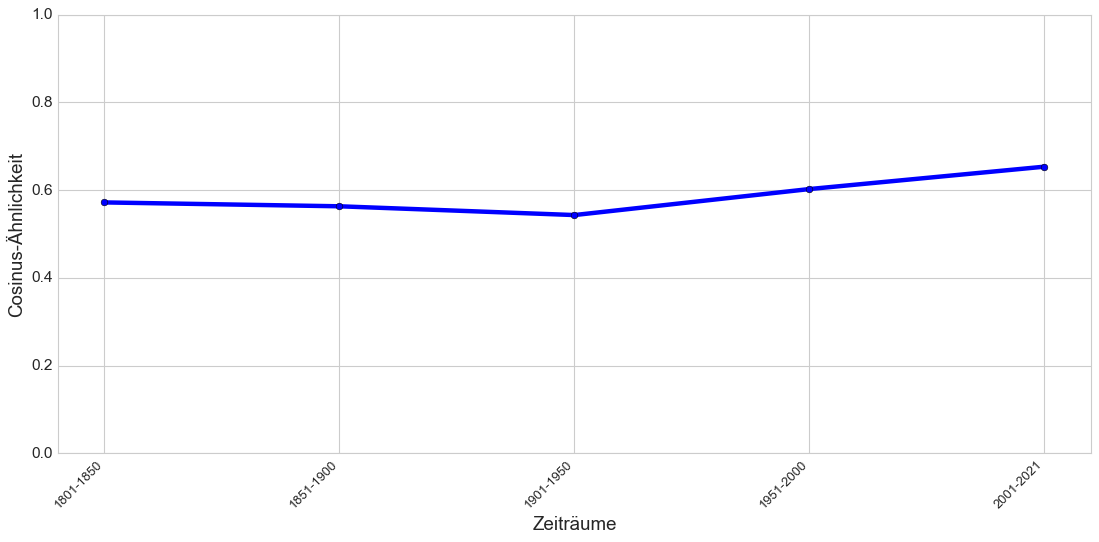

In [37]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'mostruosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='mostruosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(data.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

#### Quelldomäne

In [38]:
mostruosamente1 = compare_cos(periods, models, 'mostruosamente', 'angoscia')
mostruosamente2 = compare_cos(periods, models, 'mostruosamente', 'atterrire')
mostruosamente3 = compare_cos(periods, models, 'mostruosamente', 'panico')
mostruosamente4 = compare_cos(periods, models, 'mostruosamente', 'paura')
#mostruosamente5 = compare_cos(periods, models, 'mostruosamente', 'raccapricciare')
mostruosamente6 = compare_cos(periods, models, 'mostruosamente', 'schifo')
mostruosamente7 = compare_cos(periods, models, 'mostruosamente', 'sgomentare')
mostruosamente8 = compare_cos(periods, models, 'mostruosamente', 'sgomento')
mostruosamente9 = compare_cos(periods, models, 'mostruosamente', 'spaventare')
mostruosamente10 = compare_cos(periods, models, 'mostruosamente', 'spavento')
mostruosamente11 = compare_cos(periods, models, 'mostruosamente', 'terrore')

In [39]:
mostruosamente_df = pd.DataFrame([mostruosamente1, mostruosamente2, mostruosamente3, mostruosamente4, mostruosamente6, mostruosamente7, mostruosamente8, mostruosamente9, mostruosamente10, mostruosamente11])

# Median pro Zeitraum
mostruosamente_median = dict(mostruosamente_df.median())

# min pro Zeitraum
mostruosamente_min = dict(mostruosamente_df.min())
mostruosamente_min_list = [float(x) for x in list(mostruosamente_min.values())]

#max pro Zeitraum 
mostruosamente_max = dict(mostruosamente_df.max())
mostruosamente_max_list = [float(x) for x in list(mostruosamente_max.values())]

# 25%-Quantil
mostruosamente_25 = dict(mostruosamente_df.quantile(0.25))
mostruosamente_25_list = [float(x) for x in list(mostruosamente_25.values())]

# 75%-Quantil
mostruosamente_75 = dict(mostruosamente_df.quantile(0.75))
mostruosamente_75_list = [float(x) for x in list(mostruosamente_75.values())]

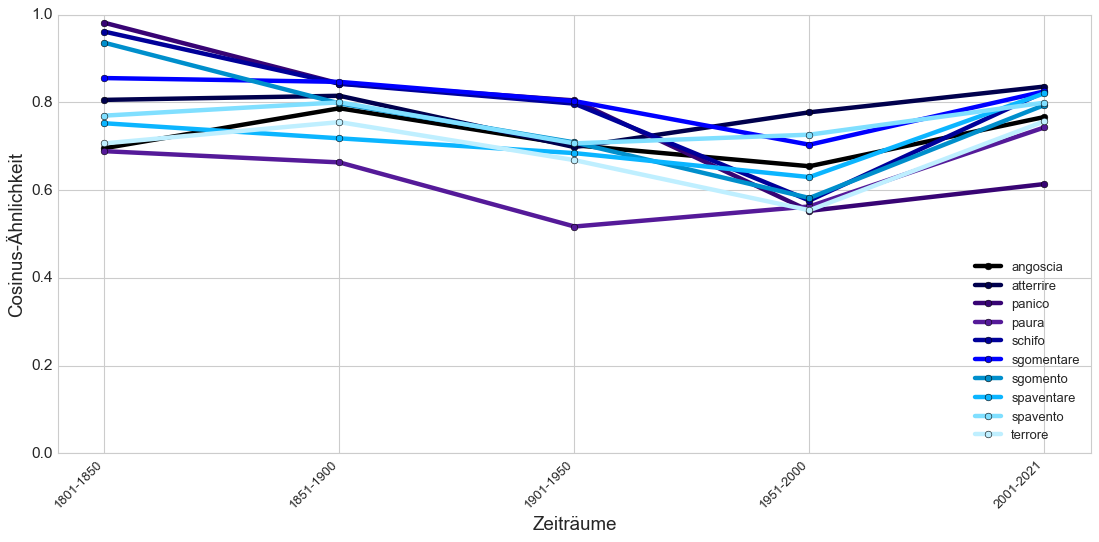

In [40]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

# Nur Median

x_indexes = list(np.arange(len(mostruosamente_median)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, mostruosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, mostruosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, mostruosamente4.values(), label='paura', marker='o', color='#551a99')
#plt.plot(x_indexes, mostruosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, mostruosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, mostruosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, mostruosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, mostruosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, mostruosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, mostruosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, mostruosamente_median.values(), label='Median', marker='o', color='r')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(mostruosamente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

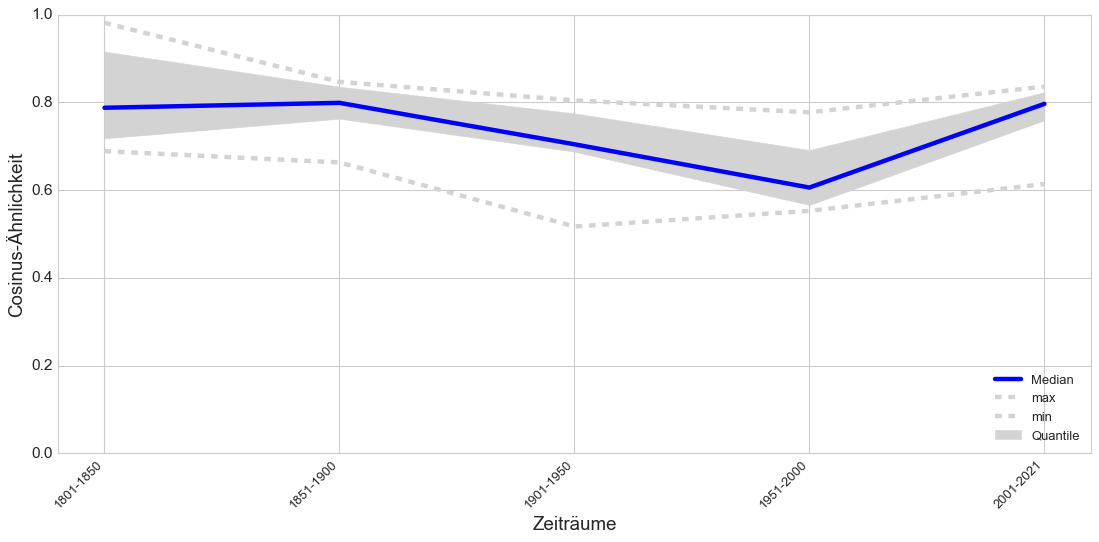

In [41]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_median)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente_median.values(), label='Median', color='b')
plt.fill_between(x_indexes, mostruosamente_75_list, mostruosamente_25_list, label='Quantile', color='#D3D3D3')
plt.plot(x_indexes, mostruosamente_max_list, label='max', linestyle='--', color='#D3D3D3')
plt.plot(x_indexes, mostruosamente_min_list, label='min', linestyle='--', color='#D3D3D3')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(mostruosamente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

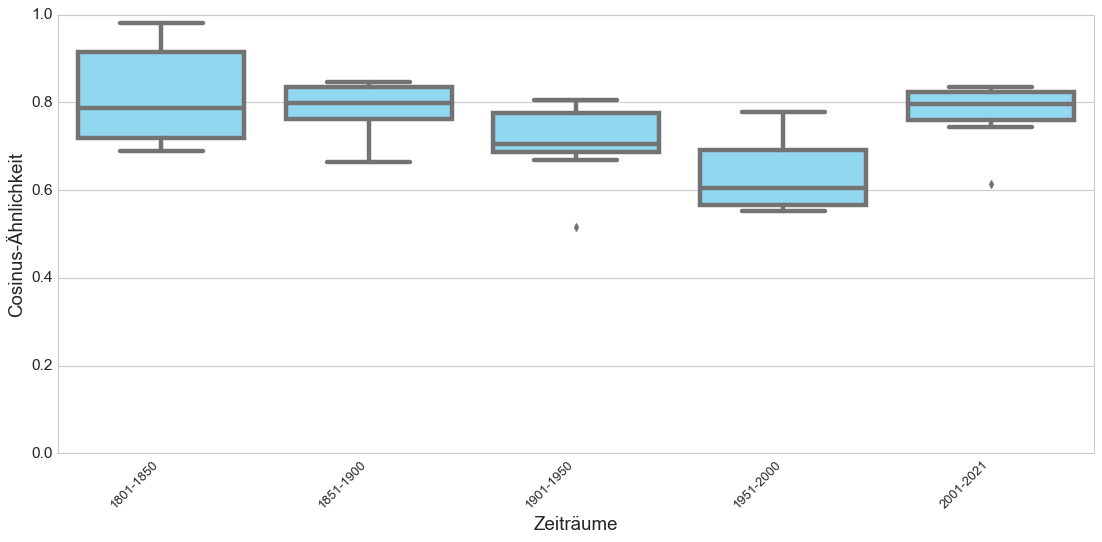

In [42]:
# box plot

plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(periods)))
plt.xticks(ticks=x_indexes, labels=periods, rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

sns.boxplot(data=mostruosamente_df, color='#80dfff');

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right', fontsize='small')

plt.show()

### orribilmente

In [43]:
compare_words(periods, models, 'orribilmente')

,1700-1750,1751-1800,1801-1850,1851-1900,1901-1950,1951-2000,2001-2021
0,"(aquilonar, 0.9623054265975952)","(teso, 0.9690667986869812)","(bagnare, 0.9721494913101196)","(gelare, 0.8234847784042358)","(terribilmente, 0.8643606901168823)","(orrendamente, 0.93257075548172)","(mutilare, 0.9439063668251038)"
1,"(empié, 0.9615519046783447)","(squallido, 0.9661396145820618)","(insanguinare, 0.9599799513816833)","(gonfiare, 0.8225429654121399)","(infelice, 0.8096177577972412)","(sfigurato, 0.9100351929664612)","(orrendamente, 0.9427146911621094)"
2,"(aquilon, 0.9575998187065125)","(spruzzare, 0.9629999995231628)","(umido, 0.9596412181854248)","(rantolo, 0.8190004825592041)","(sofferenza, 0.8033967018127441)","(mutilare, 0.8981247544288635)","(atrocemente, 0.9140669703483582)"
3,"(fischiare, 0.9562981128692627)","(ostile, 0.960573673248291)","(turbine, 0.9537437558174133)","(membra, 0.8114117980003357)","(vile, 0.7993793487548828)","(serpente, 0.8880412578582764)","(giacere, 0.8985573053359985)"
4,"(rabbioso, 0.9556703567504883)","(semivivo, 0.960159420967102)","(balzare, 0.9534018039703369)","(lampeggiare, 0.8084995150566101)","(felino, 0.7992846965789795)","(cane, 0.8801603317260742)","(avvolgere, 0.8832544088363647)"
5,"(grandine, 0.9546148777008057)","(cintare, 0.9595946669578552)","(flutto, 0.9522618651390076)","(tremendamente, 0.8078132271766663)","(gracile, 0.7973624467849731)","(straziare, 0.8769418001174927)","(killer, 0.8733367323875427)"
6,"(corse, 0.9542703032493591)","(gorgo, 0.9580532908439636)","(fuggitivo, 0.9517682790756226)","(torbido, 0.8064192533493042)","(bimba, 0.79302579164505)","(straziato, 0.8713431358337402)","(preda, 0.8710685968399048)"
7,"(puntare, 0.9537045359611511)","(gitta, 0.9571784138679504)","(fendere, 0.9513231515884399)","(singulto, 0.8053736090660095)","(cinico, 0.7925031781196594)","(tuffare, 0.8639125227928162)","(gemito, 0.8688891530036926)"
8,"(angui, 0.9533906579017639)","(ondeggiante, 0.9569166302680969)","(balze, 0.9510429501533508)","(sembravagli, 0.8045002818107605)","(impallidire, 0.7924617528915405)","(mostro, 0.8631260991096497)","(cloo, 0.8685300946235657)"
9,"(gett, 0.952343225479126)","(atra, 0.9559029340744019)","(gelo, 0.9509373903274536)","(anelito, 0.8044087290763855)","(fantoccio, 0.7915400266647339)","(coltellata, 0.8615305423736572)","(torturare, 0.8643686175346375)"


#### molto

In [44]:
compare_cos(periods, models, 'orribilmente', 'molto')

{'1700-1750': 0.4317452609539032,
 '1751-1800': 0.5016315579414368,
 '1801-1850': 0.46049612760543823,
 '1851-1900': 0.4637497365474701,
 '1901-1950': 0.4581277370452881,
 '1951-2000': 0.36957600712776184,
 '2001-2021': 0.3569771349430084}

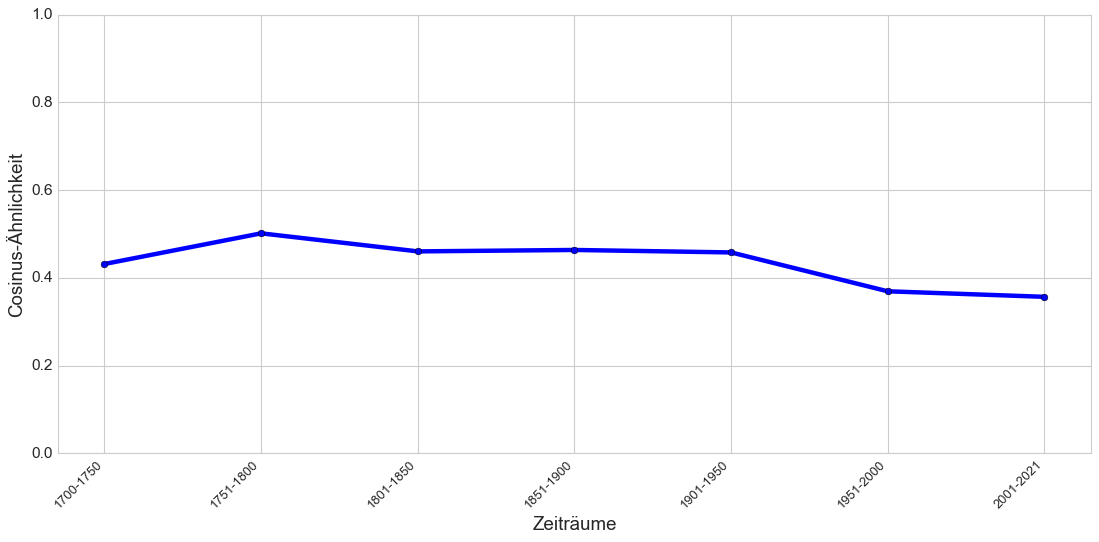

In [45]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='orribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(data.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

#### Quelldomäne

In [46]:
orribilmente1 = compare_cos(periods, models, 'orribilmente', 'angoscia')
orribilmente2 = compare_cos(periods, models, 'orribilmente', 'atterrire')
orribilmente3 = compare_cos(periods, models, 'orribilmente', 'panico')
orribilmente4 = compare_cos(periods, models, 'orribilmente', 'paura')
#orribilmente5 = compare_cos(periods, models, 'orribilmente', 'raccapricciare')
orribilmente6 = compare_cos(periods, models, 'orribilmente', 'schifo')
orribilmente7 = compare_cos(periods, models, 'orribilmente', 'sgomentare')
orribilmente8 = compare_cos(periods, models, 'orribilmente', 'sgomento')
orribilmente9 = compare_cos(periods, models, 'orribilmente', 'spaventare')
orribilmente10 = compare_cos(periods, models, 'orribilmente', 'spavento')
orribilmente11 = compare_cos(periods, models, 'orribilmente', 'terrore')

In [47]:
orribilmente_df = pd.DataFrame([orribilmente1, orribilmente2, orribilmente3, orribilmente4, orribilmente6, orribilmente7, orribilmente8, orribilmente9, orribilmente10, orribilmente11])

# Median pro Zeitraum
orribilmente_median = dict(orribilmente_df.median())

# min pro Zeitraum
orribilmente_min = dict(orribilmente_df.min())
orribilmente_min_list = [float(x) for x in list(orribilmente_min.values())]

#max pro Zeitraum 
orribilmente_max = dict(orribilmente_df.max())
orribilmente_max_list = [float(x) for x in list(orribilmente_max.values())]

# 25%-Quantil
orribilmente_25 = dict(orribilmente_df.quantile(0.25))
orribilmente_25_list = [float(x) for x in list(orribilmente_25.values())]

# 75%-Quantil
orribilmente_75 = dict(orribilmente_df.quantile(0.75))
orribilmente_75_list = [float(x) for x in list(orribilmente_75.values())]

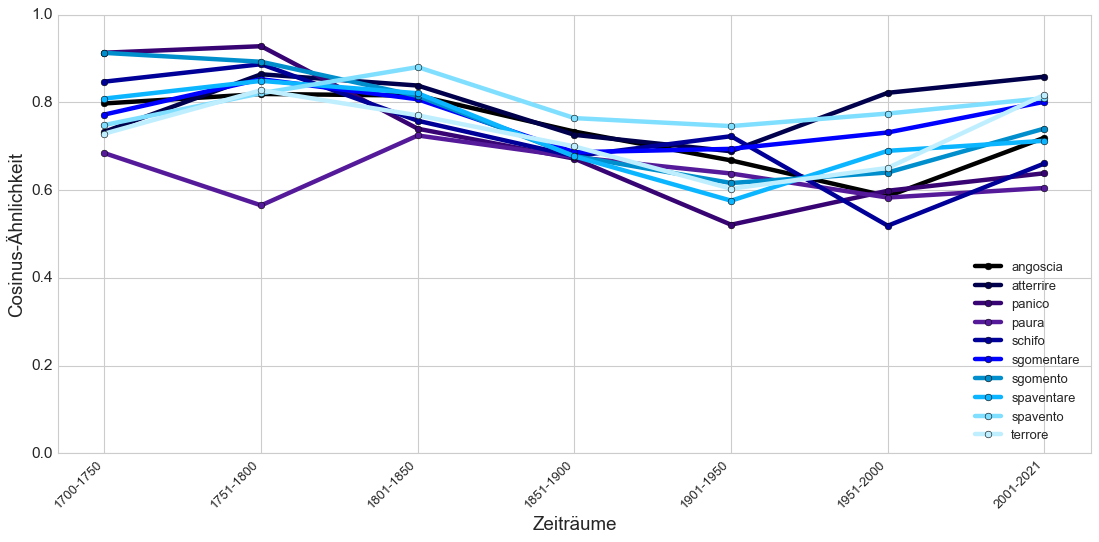

In [48]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

# Nur Median

x_indexes = list(np.arange(len(orribilmente_median)))
plt.xticks(ticks=x_indexes, labels=orribilmente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orribilmente4.values(), label='paura', marker='o', color='#551a99')
#plt.plot(x_indexes, orribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orribilmente_median.values(), label='Median', marker='o', color='r')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(orribilmente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

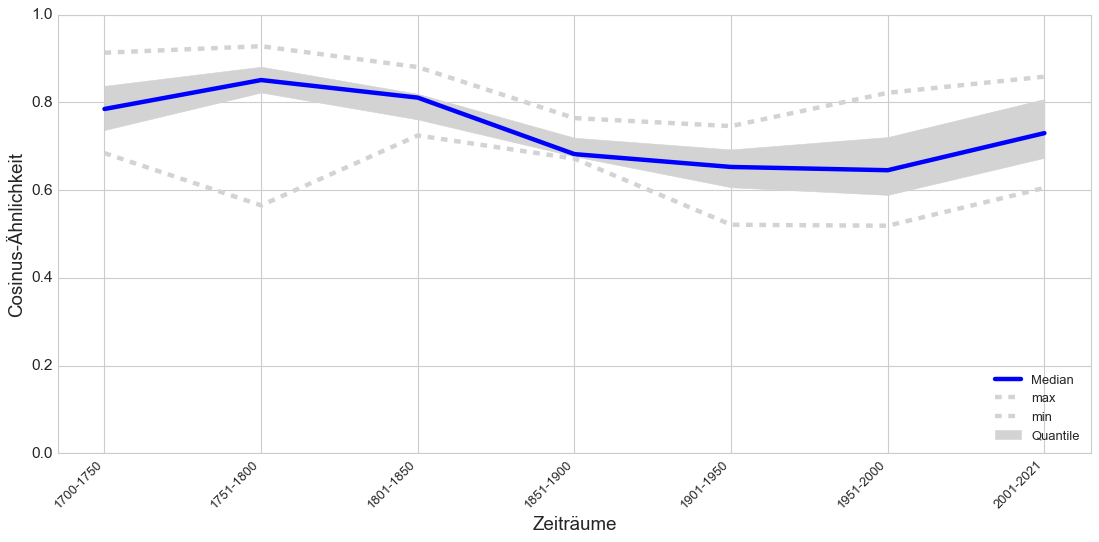

In [49]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_median)))
plt.xticks(ticks=x_indexes, labels=orribilmente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente_median.values(), label='Median', color='b')
plt.fill_between(x_indexes, orribilmente_75_list, orribilmente_25_list, label='Quantile', color='#D3D3D3')
plt.plot(x_indexes, orribilmente_max_list, label='max', linestyle='--', color='#D3D3D3')
plt.plot(x_indexes, orribilmente_min_list, label='min', linestyle='--', color='#D3D3D3')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(orribilmente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

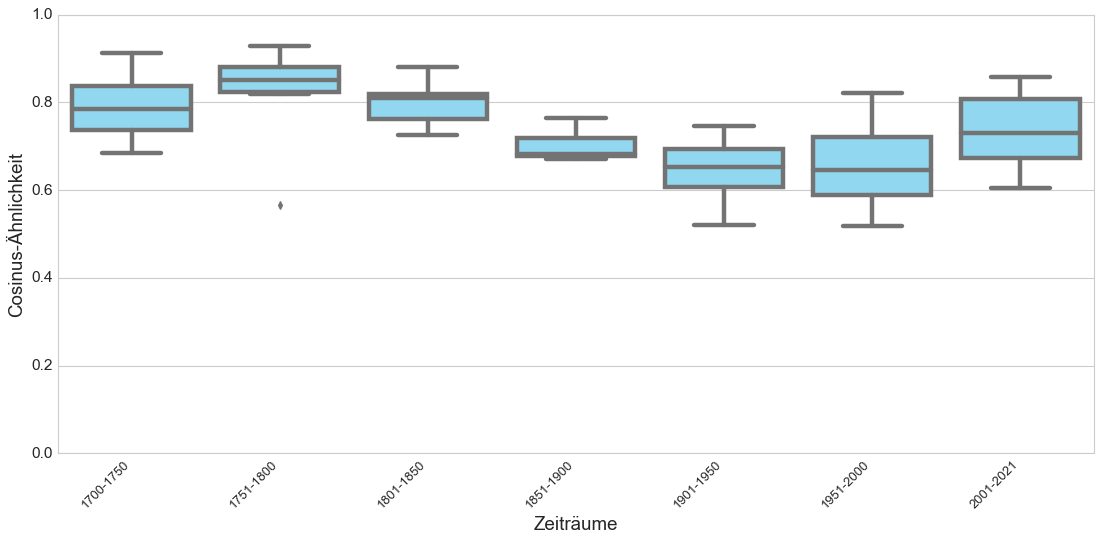

In [50]:
# box plot

plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(periods)))
plt.xticks(ticks=x_indexes, labels=periods, rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

sns.boxplot(data=orribilmente_df, color='#80dfff');

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right', fontsize='small')

plt.show()

### spaventosamente

In [51]:
compare_words(periods, models, 'spaventosamente')

,1700-1750,1751-1800,1801-1850,1851-1900,1901-1950,1951-2000,2001-2021
0,"(levatasi, 0.9870378971099854)",not in vocab,"(infocato, 0.9940279126167297)","(fitta, 0.9504045844078064)","(felino, 0.9014610052108765)","(mostruosamente, 0.8991979956626892)","(terribilmente, 0.8652024865150452)"
1,"(addí, 0.9865628480911255)",not in vocab,"(bionda, 0.9938779473304749)","(svan, 0.9474653005599976)","(contorcere, 0.8956184983253479)","(concentrato, 0.8767663240432739)","(leggero, 0.8555836081504822)"
2,"(calatabillotta, 0.9855952262878418)",not in vocab,"(svelti, 0.9935976266860962)","(appar, 0.9428836107254028)","(pulsare, 0.8940143585205078)","(distaccare, 0.8681278824806213)","(spaventoso, 0.8535206317901611)"
3,"(uffiziata, 0.9854881167411804)",not in vocab,"(infiammato, 0.9935896992683411)","(affissarmi, 0.9427630305290222)","(membra, 0.8814567923545837)","(giungla, 0.867201030254364)","(razza, 0.8522544503211975)"
4,"(inond, 0.9854061603546143)",not in vocab,"(grondante, 0.9935266971588135)","(vitrei, 0.9398960471153259)","(attanagliare, 0.8794525861740112)","(depressione, 0.8620181679725647)","(mostruosamente, 0.8486772775650024)"
5,"(soccorrerla, 0.9853907227516174)",not in vocab,"(ributtavano, 0.9934291243553162)","(divoratore, 0.9386443495750427)","(sconvolto, 0.8784911036491394)","(infinitamente, 0.859880268573761)","(comprensibile, 0.8444148898124695)"
6,"(ressurrezione, 0.985237181186676)",not in vocab,"(vermigli, 0.993373692035675)","(agitantisi, 0.9384768605232239)","(tremito, 0.8768960237503052)","(vite, 0.8573650121688843)","(leggermente, 0.8440542817115784)"
7,"(sedicesimo, 0.9849461913108826)",not in vocab,"(divampante, 0.9932618141174316)","(gonfiezza, 0.938381552696228)","(convulsione, 0.8744856715202332)","(drammaticamente, 0.857203483581543)","(riflesso, 0.8397258520126343)"
8,"(edificazione, 0.9848015904426575)",not in vocab,"(lacerati, 0.9931974411010742)","(sottrarvi, 0.9374977350234985)","(dilaniare, 0.8742559552192688)","(virus, 0.8569896817207336)","(innalzare, 0.8385769724845886)"
9,"(incarnazione, 0.9847584366798401)",not in vocab,"(balzò, 0.9931615591049194)","(annuvol, 0.9367322325706482)","(gracile, 0.8725352883338928)","(spaventoso, 0.8564431667327881)","(lento, 0.8376616835594177)"


#### molto

In [52]:
compare_cos(periods, models, 'spaventosamente', 'molto')

{'1700-1750': 0.5711721181869507,
 '1801-1850': 0.5338065028190613,
 '1851-1900': 0.503583550453186,
 '1901-1950': 0.4392169713973999,
 '1951-2000': 0.6511768102645874,
 '2001-2021': 0.637313723564148}

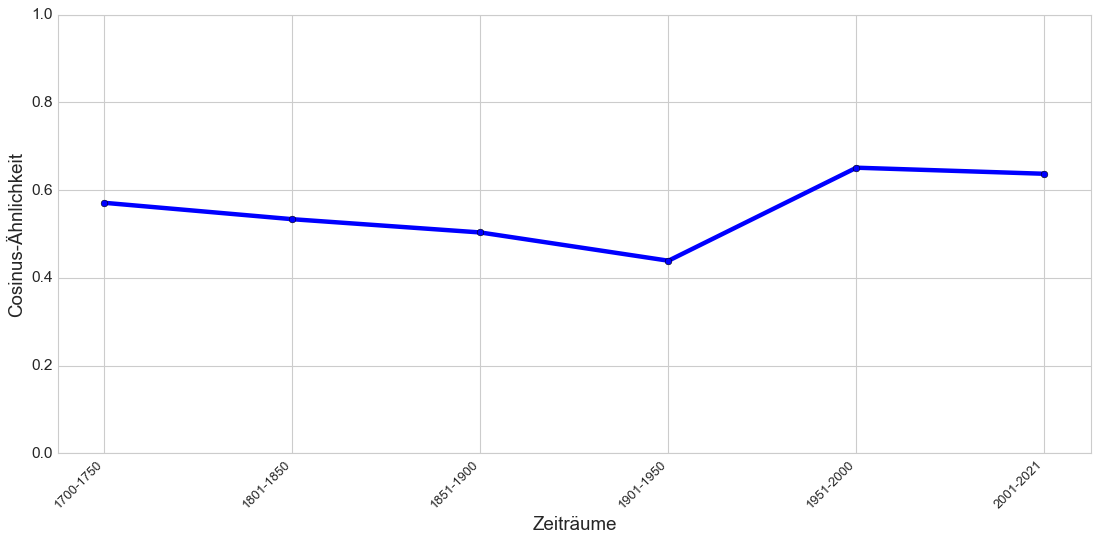

In [53]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(data.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

#### Quelldomäne

In [54]:
spaventosamente1 = compare_cos(periods, models, 'spaventosamente', 'angoscia')
spaventosamente2 = compare_cos(periods, models, 'spaventosamente', 'atterrire')
spaventosamente3 = compare_cos(periods, models, 'spaventosamente', 'panico')
spaventosamente4 = compare_cos(periods, models, 'spaventosamente', 'paura')
#spaventosamente5 = compare_cos(periods, models, 'spaventosamente', 'raccapricciare')
spaventosamente6 = compare_cos(periods, models, 'spaventosamente', 'schifo')
spaventosamente7 = compare_cos(periods, models, 'spaventosamente', 'sgomentare')
spaventosamente8 = compare_cos(periods, models, 'spaventosamente', 'sgomento')
spaventosamente9 = compare_cos(periods, models, 'spaventosamente', 'spaventare')
spaventosamente10 = compare_cos(periods, models, 'spaventosamente', 'spavento')
spaventosamente11 = compare_cos(periods, models, 'spaventosamente', 'terrore')

In [55]:
spaventosamente_df = pd.DataFrame([spaventosamente1, spaventosamente2, spaventosamente3, spaventosamente4, spaventosamente6, spaventosamente7, spaventosamente8, spaventosamente9, spaventosamente10, spaventosamente11])

# Median pro Zeitraum
spaventosamente_median = dict(spaventosamente_df.median())

# min pro Zeitraum
spaventosamente_min = dict(spaventosamente_df.min())
spaventosamente_min_list = [float(x) for x in list(spaventosamente_min.values())]

#max pro Zeitraum 
spaventosamente_max = dict(spaventosamente_df.max())
spaventosamente_max_list = [float(x) for x in list(spaventosamente_max.values())]

# 25%-Quantil
spaventosamente_25 = dict(spaventosamente_df.quantile(0.25))
spaventosamente_25_list = [float(x) for x in list(spaventosamente_25.values())]

# 75%-Quantil
spaventosamente_75 = dict(spaventosamente_df.quantile(0.75))
spaventosamente_75_list = [float(x) for x in list(spaventosamente_75.values())]

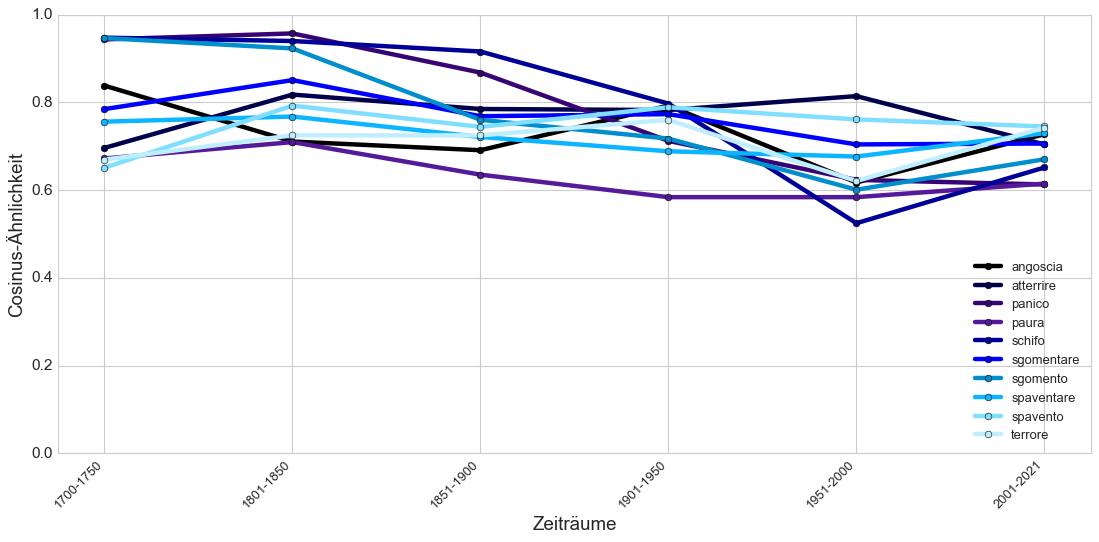

In [56]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

# Nur Median

x_indexes = list(np.arange(len(spaventosamente_median)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, spaventosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, spaventosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, spaventosamente4.values(), label='paura', marker='o', color='#551a99')
#plt.plot(x_indexes, spaventosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, spaventosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, spaventosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, spaventosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, spaventosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, spaventosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, spaventosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, spaventosamente_median.values(), label='Median', marker='o', color='r')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(spaventosamente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

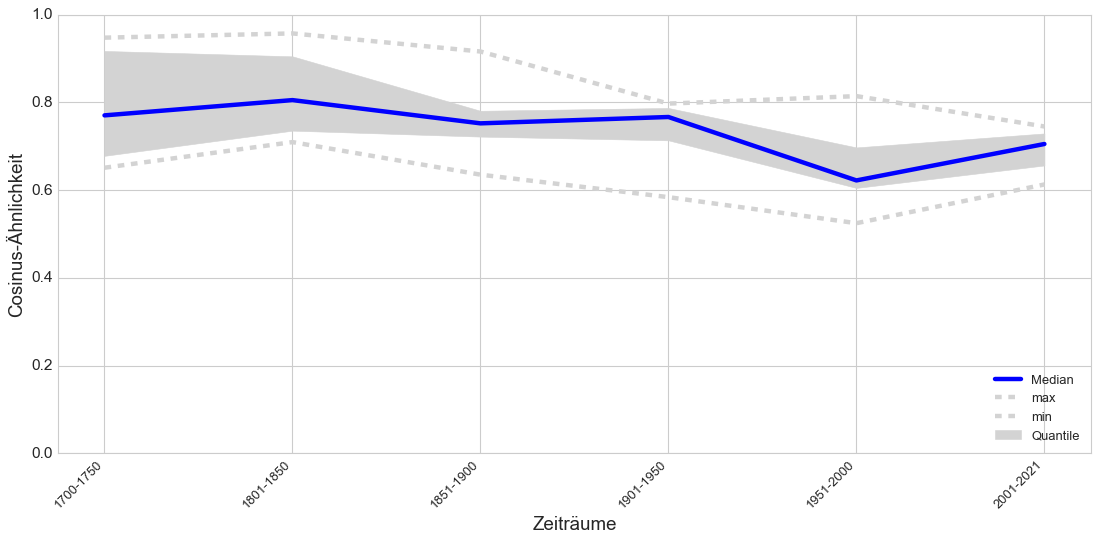

In [57]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_median)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_median.values(), label='Median', color='b')
plt.fill_between(x_indexes, spaventosamente_75_list, spaventosamente_25_list, label='Quantile', color='#D3D3D3')
plt.plot(x_indexes, spaventosamente_max_list, label='max', linestyle='--', color='#D3D3D3')
plt.plot(x_indexes, spaventosamente_min_list, label='min', linestyle='--', color='#D3D3D3')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(spaventosamente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

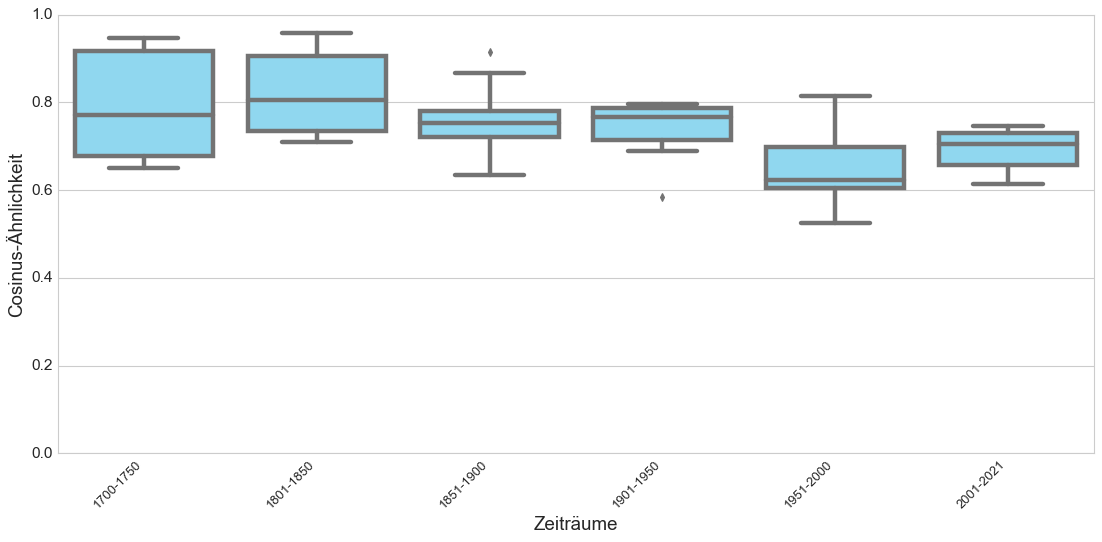

In [58]:
# box plot

plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(periods)))
plt.xticks(ticks=x_indexes, labels=periods, rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

sns.boxplot(data=spaventosamente_df, color='#80dfff');

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right', fontsize='small')

plt.show()

### terribilmente

In [59]:
compare_words(periods, models, 'terribilmente')

,1700-1750,1751-1800,1801-1850,1851-1900,1901-1950,1951-2000,2001-2021
0,"(celermente, 0.9889183044433594)","(irrevocabilmente, 0.9833030104637146)","(atteggiamento, 0.9632821083068848)","(trem, 0.8426634073257446)","(crudele, 0.8813502192497253)","(tremendamente, 0.8827456831932068)","(talmente, 0.9171996116638184)"
1,"(enza, 0.9888990521430969)","(schierare, 0.9831733107566833)","(abbagliare, 0.9610476493835449)","(ripiombare, 0.8395265936851501)","(infelice, 0.8794116377830505)","(frivolo, 0.848967432975769)","(tremendamente, 0.9164686799049377)"
2,"(granatello, 0.9883054494857788)","(lever, 0.9822202324867249)","(subitaneo, 0.9595870971679688)","(dolorosamente, 0.8351044058799744)","(sofferenza, 0.871516764163971)","(simpatico, 0.8486996293067932)","(atroce, 0.8967365026473999)"
3,"(rivolgeano, 0.987943708896637)","(navigante, 0.9820261001586914)","(annidare, 0.9594749808311462)","(tremendamente, 0.8305768370628357)","(orribilmente, 0.8643608093261719)","(talmente, 0.8450892567634583)","(sensazione, 0.8958004713058472)"
4,"(bersagliare, 0.9879397749900818)","(attendea, 0.9817209243774414)","(istantaneo, 0.9577659964561462)","(languido, 0.8281146883964539)","(cinico, 0.8599224090576172)","(cinico, 0.843381404876709)","(mostruosamente, 0.8886141180992126)"
5,"(odrisie, 0.9877519607543945)","(mannaia, 0.9811393618583679)","(bollire, 0.9563679695129395)","(gelare, 0.8276501297950745)","(incosciente, 0.8562343120574951)","(mortificare, 0.8400264382362366)","(angosciante, 0.8863885998725891)"
6,"(torrioni, 0.9874990582466125)","(traea, 0.9810706973075867)","(voluttuoso, 0.9561823010444641)","(raddolcire, 0.8274141550064087)","(crudeltà, 0.8522710800170898)","(involucro, 0.8393862843513489)","(orribile, 0.8857797384262085)"
7,"(flottiglia, 0.9874913096427917)","(tart, 0.9810033440589905)","(impercettibile, 0.9561634063720703)","(stringimento, 0.8271189332008362)","(vile, 0.8515623807907104)","(bugia, 0.8372468948364258)","(crudele, 0.8856202960014343)"
8,"(garfagnana, 0.9873005151748657)","(disturbar, 0.9809638857841492)","(momentaneo, 0.9556787610054016)","(arteria, 0.8270336985588074)","(innocente, 0.8488354682922363)","(noioso, 0.8350874781608582)","(feroce, 0.8851287364959717)"
9,"(piaggie, 0.987277626991272)","(travestire, 0.9809566736221313)","(temperatura, 0.9552338719367981)","(simulare, 0.8267632722854614)","(malvagio, 0.8483802676200867)","(piacevole, 0.8338776230812073)","(talvolta, 0.8825327754020691)"


#### molto

In [60]:
compare_cos(periods, models, 'terribilmente', 'molto')

{'1700-1750': 0.5228032469749451,
 '1751-1800': 0.5791978240013123,
 '1801-1850': 0.61345374584198,
 '1851-1900': 0.49506106972694397,
 '1901-1950': 0.48828256130218506,
 '1951-2000': 0.6587146520614624,
 '2001-2021': 0.5871368646621704}

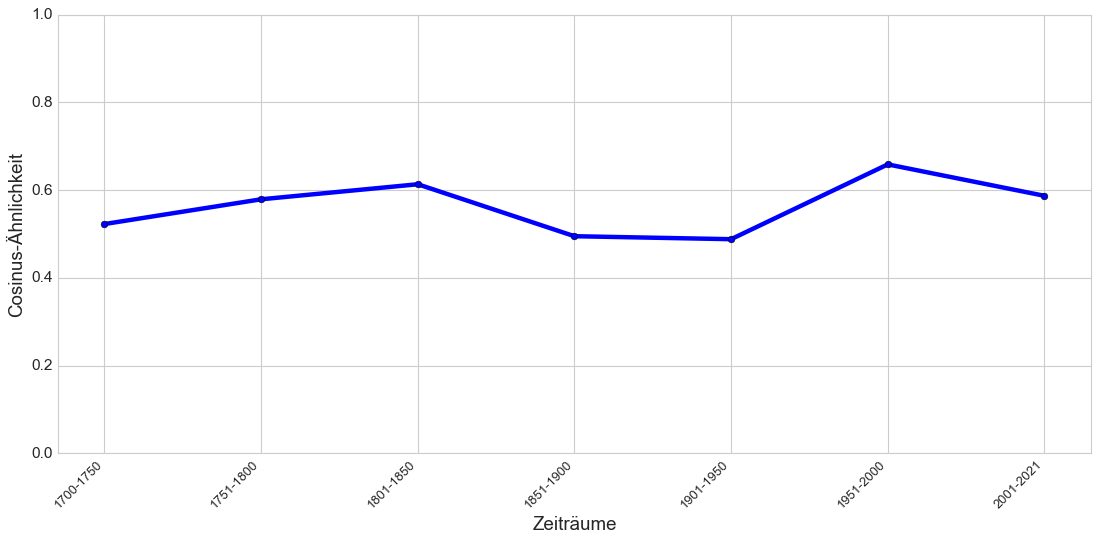

In [61]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(data.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

#### Quelldomäne

In [62]:
terribilmente1 = compare_cos(periods, models, 'terribilmente', 'angoscia')
terribilmente2 = compare_cos(periods, models, 'terribilmente', 'atterrire')
terribilmente3 = compare_cos(periods, models, 'terribilmente', 'panico')
terribilmente4 = compare_cos(periods, models, 'terribilmente', 'paura')
#terribilmente5 = compare_cos(periods, models, 'terribilmente', 'raccapricciare')
terribilmente6 = compare_cos(periods, models, 'terribilmente', 'schifo')
terribilmente7 = compare_cos(periods, models, 'terribilmente', 'sgomentare')
terribilmente8 = compare_cos(periods, models, 'terribilmente', 'sgomento')
terribilmente9 = compare_cos(periods, models, 'terribilmente', 'spaventare')
terribilmente10 = compare_cos(periods, models, 'terribilmente', 'spavento')
terribilmente11 = compare_cos(periods, models, 'terribilmente', 'terrore')

In [63]:
terribilmente_df = pd.DataFrame([terribilmente1, terribilmente2, terribilmente3, terribilmente4, terribilmente6, terribilmente7, terribilmente8, terribilmente9, terribilmente10, terribilmente11])

# Median pro Zeitraum
terribilmente_median = dict(terribilmente_df.median())

# min pro Zeitraum
terribilmente_min = dict(terribilmente_df.min())
terribilmente_min_list = [float(x) for x in list(terribilmente_min.values())]

#max pro Zeitraum 
terribilmente_max = dict(terribilmente_df.max())
terribilmente_max_list = [float(x) for x in list(terribilmente_max.values())]

# 25%-Quantil
terribilmente_25 = dict(terribilmente_df.quantile(0.25))
terribilmente_25_list = [float(x) for x in list(terribilmente_25.values())]

# 75%-Quantil
terribilmente_75 = dict(terribilmente_df.quantile(0.75))
terribilmente_75_list = [float(x) for x in list(terribilmente_75.values())]

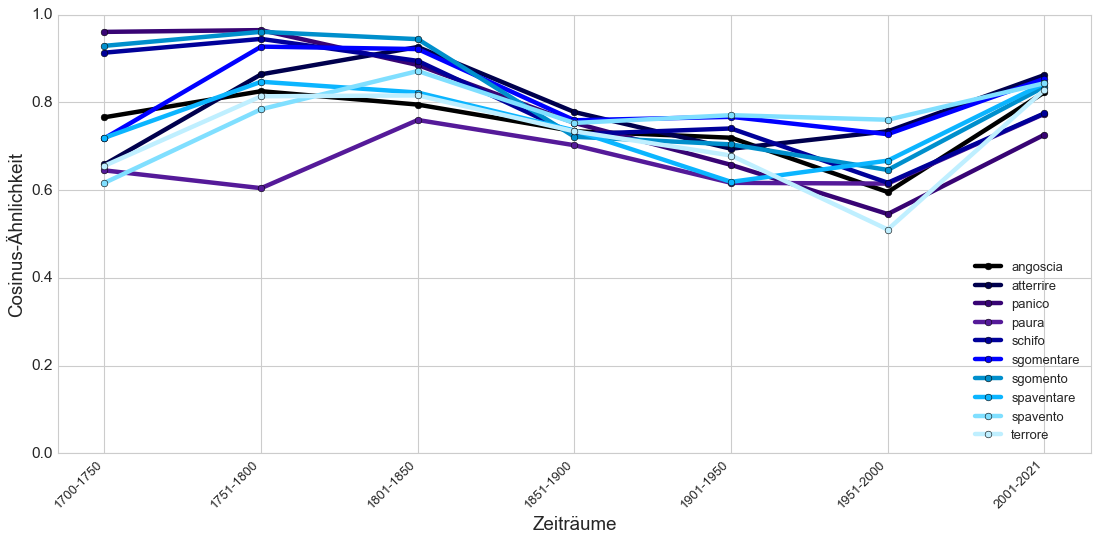

In [64]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

# Nur Median

x_indexes = list(np.arange(len(terribilmente_median)))
plt.xticks(ticks=x_indexes, labels=terribilmente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, terribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, terribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, terribilmente4.values(), label='paura', marker='o', color='#551a99')
#plt.plot(x_indexes, terribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, terribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, terribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, terribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, terribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, terribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, terribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, terribilmente_median.values(), label='Median', marker='o', color='r')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(terribilmente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

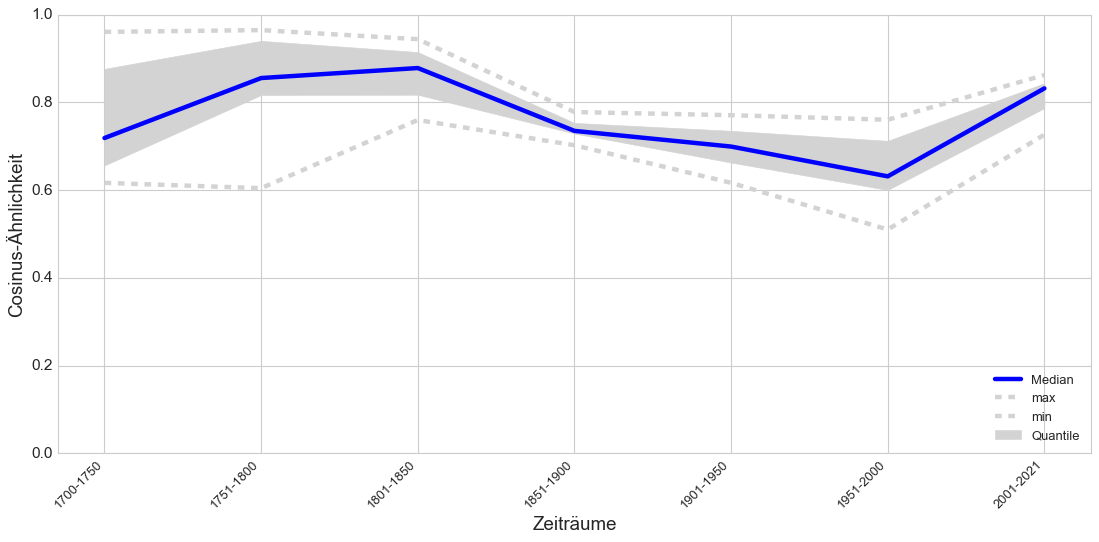

In [65]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_median)))
plt.xticks(ticks=x_indexes, labels=terribilmente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente_median.values(), label='Median', color='b')
plt.fill_between(x_indexes, terribilmente_75_list, terribilmente_25_list, label='Quantile', color='#D3D3D3')
plt.plot(x_indexes, terribilmente_max_list, label='max', linestyle='--', color='#D3D3D3')
plt.plot(x_indexes, terribilmente_min_list, label='min', linestyle='--', color='#D3D3D3')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(terribilmente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

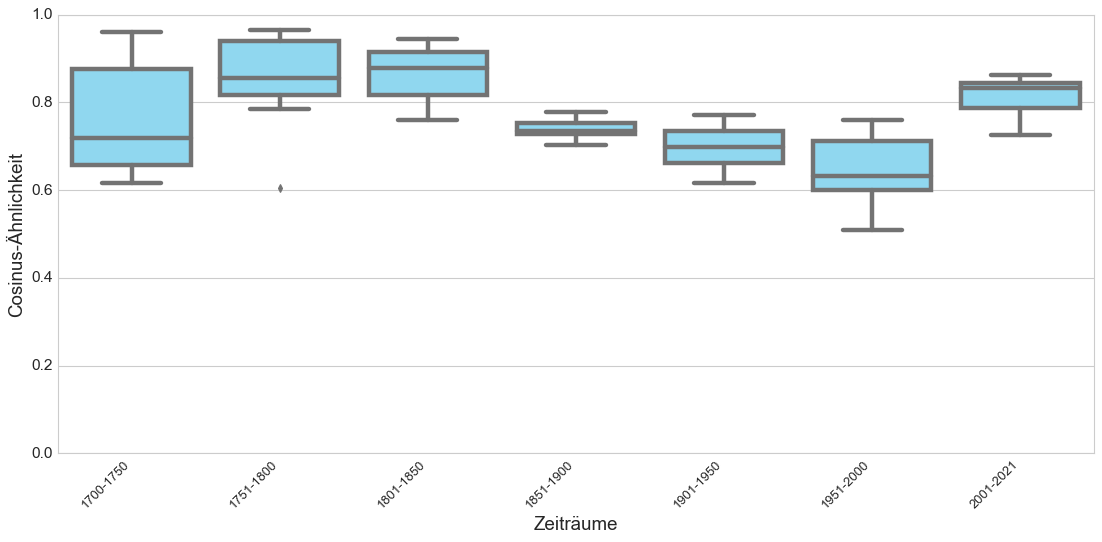

In [66]:
# box plot

plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(periods)))
plt.xticks(ticks=x_indexes, labels=periods, rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

sns.boxplot(data=terribilmente_df, color='#80dfff');

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right', fontsize='small')

plt.show()

### tremendamente

In [67]:
compare_words(periods, models, 'tremendamente')

,1700-1750,1751-1800,1801-1850,1851-1900,1901-1950,1951-2000,2001-2021
0,not in vocab,not in vocab,"(euterpe, 0.9962280988693237)","(lanima, 0.9130298495292664)","(simulare, 0.9487106800079346)","(involucro, 0.9443007111549377)","(talmente, 0.9509647488594055)"
1,not in vocab,not in vocab,"(inudito, 0.9960553646087646)","(comprimere, 0.9014565348625183)","(infondere, 0.9403997659683228)","(penetrante, 0.9423416256904602)","(realistico, 0.9412376284599304)"
2,not in vocab,not in vocab,"(spiccasi, 0.9957061409950256)","(straziare, 0.8951560258865356)","(irragionevole, 0.9373648166656494)","(superficiale, 0.9422646760940552)","(angosciante, 0.9408090114593506)"
3,not in vocab,not in vocab,"(adusti, 0.995674192905426)","(crudelt, 0.8883981704711914)","(repulsione, 0.9348644018173218)","(grossolano, 0.9411492943763733)","(assurdo, 0.935326337814331)"
4,not in vocab,not in vocab,"(segugio, 0.9956594109535217)","(corruccio, 0.8848130702972412)","(innato, 0.9328160285949707)","(poeticamente, 0.9406328201293945)","(estraneo, 0.9324788451194763)"
5,not in vocab,not in vocab,"(adorarla, 0.995510995388031)","(placare, 0.8830258846282959)","(fastidioso, 0.9321564435958862)","(frivolo, 0.9404172301292419)","(furbo, 0.9318959712982178)"
6,not in vocab,not in vocab,"(stracchi, 0.9954665899276733)","(stringimento, 0.8786757588386536)","(incosciente, 0.9314471483230591)","(volutamente, 0.9391322731971741)","(stanchezza, 0.9308832883834839)"
7,not in vocab,not in vocab,"(soffitta, 0.9954463839530945)","(tecla, 0.878271758556366)","(sapor, 0.9279640316963196)","(truculento, 0.9388092756271362)","(stupido, 0.9302935004234314)"
8,not in vocab,not in vocab,"(doganiere, 0.9953349828720093)","(anelare, 0.8777523040771484)","(acuire, 0.9275463819503784)","(sciatto, 0.9383787512779236)","(cmq, 0.9298661351203918)"
9,not in vocab,not in vocab,"(scheggiare, 0.9953060746192932)","(simulare, 0.877548336982727)","(cattiveria, 0.9274855256080627)","(impressionistico, 0.9381115436553955)","(spiacevole, 0.9285446405410767)"


#### molto

In [68]:
compare_cos(periods, models, 'tremendamente', 'molto')

{'1801-1850': 0.5225103497505188,
 '1851-1900': 0.4629253149032593,
 '1901-1950': 0.5150805711746216,
 '1951-2000': 0.6602395176887512,
 '2001-2021': 0.6668710112571716}

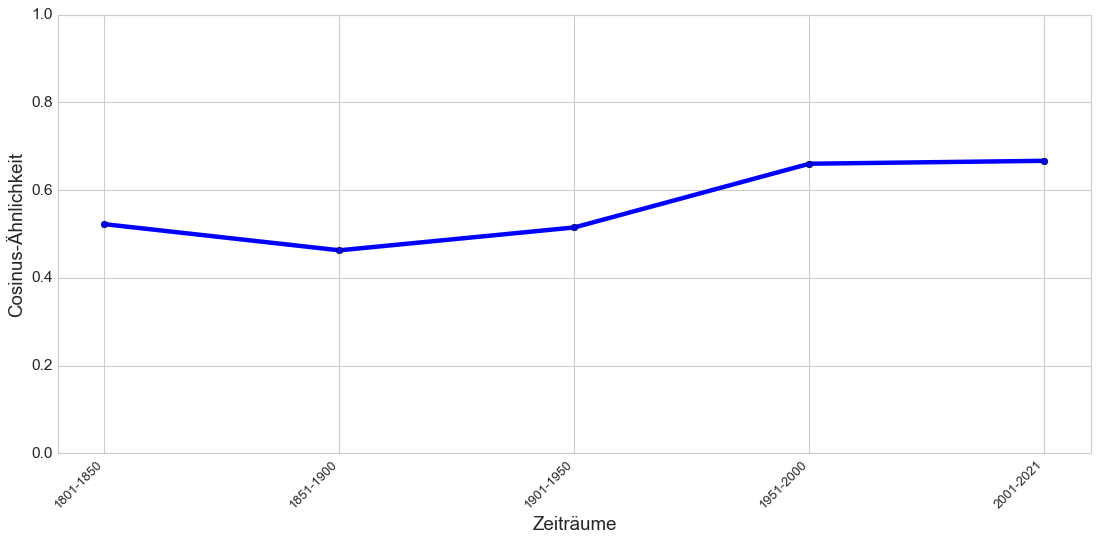

In [69]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'tremendamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='tremendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(data.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

#### Quelldomäne

In [70]:
tremendamente1 = compare_cos(periods, models, 'tremendamente', 'angoscia')
tremendamente2 = compare_cos(periods, models, 'tremendamente', 'atterrire')
tremendamente3 = compare_cos(periods, models, 'tremendamente', 'panico')
tremendamente4 = compare_cos(periods, models, 'tremendamente', 'paura')
#tremendamente5 = compare_cos(periods, models, 'tremendamente', 'raccapricciare')
tremendamente6 = compare_cos(periods, models, 'tremendamente', 'schifo')
tremendamente7 = compare_cos(periods, models, 'tremendamente', 'sgomentare')
tremendamente8 = compare_cos(periods, models, 'tremendamente', 'sgomento')
tremendamente9 = compare_cos(periods, models, 'tremendamente', 'spaventare')
tremendamente10 = compare_cos(periods, models, 'tremendamente', 'spavento')
tremendamente11 = compare_cos(periods, models, 'tremendamente', 'terrore')

In [71]:
tremendamente_df = pd.DataFrame([tremendamente1, tremendamente2, tremendamente3, tremendamente4, tremendamente6, tremendamente7, tremendamente8, tremendamente9, tremendamente10, tremendamente11])

# Median pro Zeitraum
tremendamente_median = dict(tremendamente_df.median())

# min pro Zeitraum
tremendamente_min = dict(tremendamente_df.min())
tremendamente_min_list = [float(x) for x in list(tremendamente_min.values())]

#max pro Zeitraum 
tremendamente_max = dict(tremendamente_df.max())
tremendamente_max_list = [float(x) for x in list(tremendamente_max.values())]

# 25%-Quantil
tremendamente_25 = dict(tremendamente_df.quantile(0.25))
tremendamente_25_list = [float(x) for x in list(tremendamente_25.values())]

# 75%-Quantil
tremendamente_75 = dict(tremendamente_df.quantile(0.75))
tremendamente_75_list = [float(x) for x in list(tremendamente_75.values())]

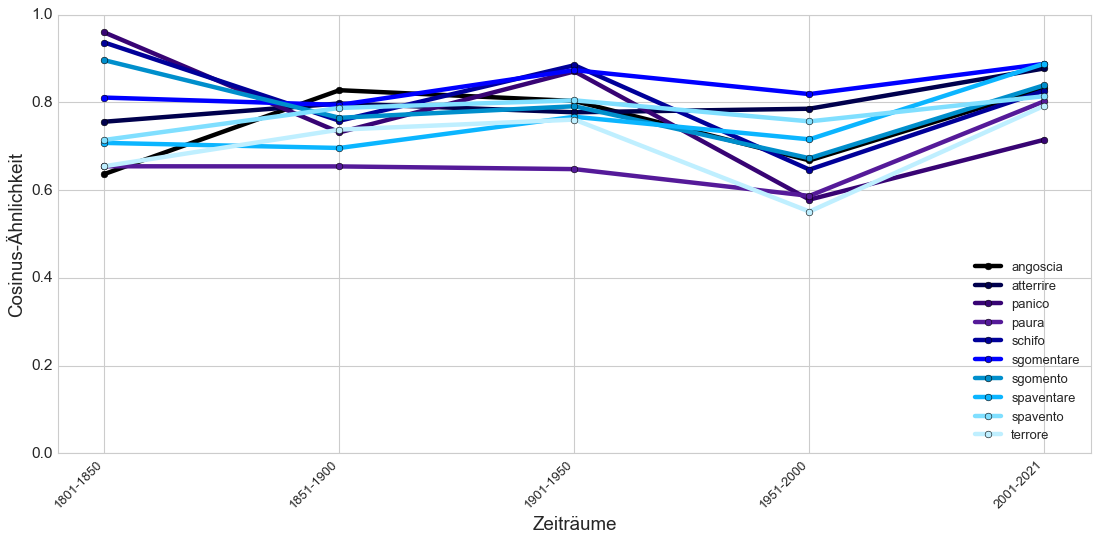

In [72]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

# Nur Median

x_indexes = list(np.arange(len(tremendamente_median)))
plt.xticks(ticks=x_indexes, labels=tremendamente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, tremendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, tremendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, tremendamente4.values(), label='paura', marker='o', color='#551a99')
#plt.plot(x_indexes, tremendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, tremendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, tremendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, tremendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, tremendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, tremendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, tremendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, tremendamente_median.values(), label='Median', marker='o', color='r')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(tremendamente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

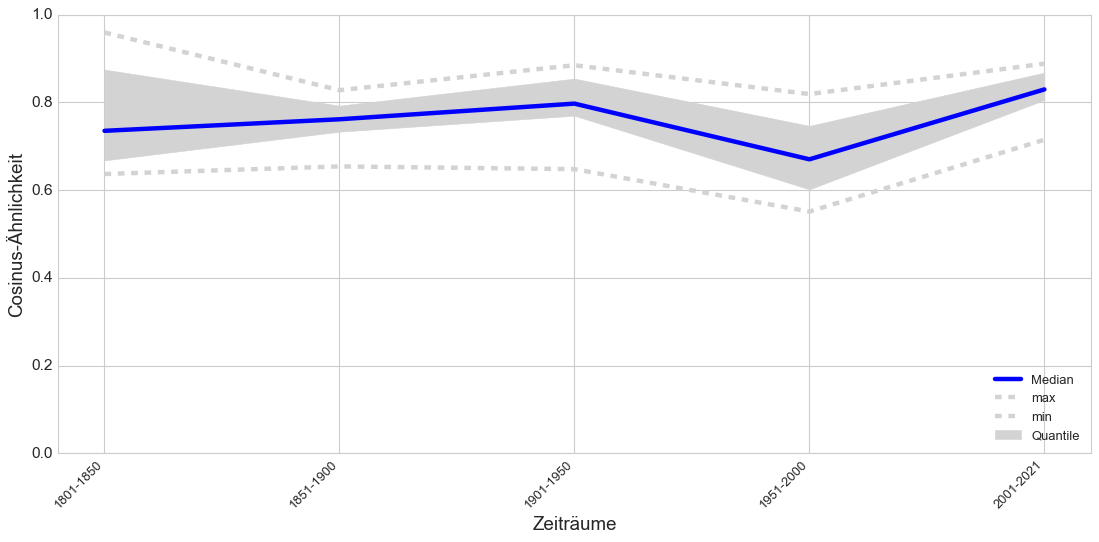

In [73]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_median)))
plt.xticks(ticks=x_indexes, labels=tremendamente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente_median.values(), label='Median', color='b')
plt.fill_between(x_indexes, tremendamente_75_list, tremendamente_25_list, label='Quantile', color='#D3D3D3')
plt.plot(x_indexes, tremendamente_max_list, label='max', linestyle='--', color='#D3D3D3')
plt.plot(x_indexes, tremendamente_min_list, label='min', linestyle='--', color='#D3D3D3')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(tremendamente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

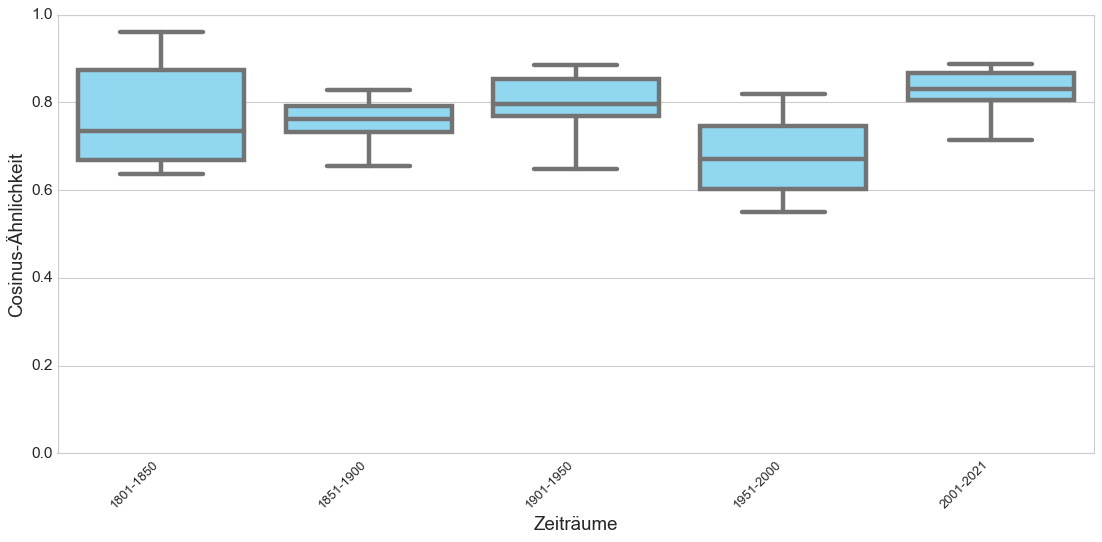

In [74]:
# box plot

plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(periods)))
plt.xticks(ticks=x_indexes, labels=periods, rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

sns.boxplot(data=tremendamente_df, color='#80dfff');

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right', fontsize='small')

plt.show()